## Final Project - German Bank Loan

**Objective**

The objective of the final project will be to build a fully reproducible project that uses ML to address a question of your choice (e.g. in academic or industry).The dataset required for this project is provided along with this document (see details below). This is an individual project. Since this course is an advanced undergraduate/graduate student level course, it is expected that the final report should be publishable and fully reproducible.

**Domain: Banking**

Context: This data set contains historical data of the customers who have taken loans from a German bank and the bank is facing issues with loan defaulters. 
**The bank intends to build a machine learning model to predict whether the customer will default or not based on historical data**

Dataset - German_bank.csv

Data Description: The bank has historical information on relevant features for each customer such as employment duration, existing loans count, saving balance, percentage of income, age, default status. 

The data set has 17 columns and 1000 rows. Columns are described below and each row is a customer. 

1. **checking_balance - Amount of money available in account of customers**
2. **months_loan_duration - Duration since loan taken**
3. **credit_history - credit history of each customers**
4. **purpose - Purpose why loan has been taken**
5. **amount - Amount of loan taken**
6. **savings_balance - Balance in account**
7. **employment_duration - Duration of employment**
8. **percent_of_income - Percentage of monthly income**
9. **years_at_residence - Duration of current residence**
10. **age - Age of customer**
11. **other_credit - Any other credits taken**
12. **housing- Type of housing, rent or own**
13. **existing_loans_count - Existing count of loans**
14. **job - Job type**
15. **dependents - Any dependents on customer**
16. **phone - Having phone or not**
17. **default - Default status (Target column)**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
url = 'C:\\Users\\lenovo\\Downloads\\credit.csv'
dataset = pd.read_csv(url)

In [3]:
dataset.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
dataset.info() #summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
dataset.isnull().sum()   # no missing values

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numeric values
dataset['checking_balance'] = le.fit_transform(dataset['checking_balance'].astype(str))
dataset['credit_history'] = le.fit_transform(dataset['credit_history'].astype(str))
dataset['purpose'] = le.fit_transform(dataset['purpose'].astype(str))
dataset['savings_balance'] = le.fit_transform(dataset['savings_balance'].astype(str))
dataset['employment_duration'] = le.fit_transform(dataset['employment_duration'].astype(str))
dataset['housing'] = le.fit_transform(dataset['housing'].astype(str))
dataset['other_credit'] = le.fit_transform(dataset['other_credit'].astype(str))
dataset['job'] = le.fit_transform(dataset['job'].astype(str))
dataset['phone'] = le.fit_transform(dataset['phone'].astype(str))
dataset['default'] = le.fit_transform(dataset['default'].astype(str))


In [7]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int32
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int32
 3   purpose               1000 non-null   int32
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int32
 6   employment_duration   1000 non-null   int32
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int32
 11  housing               1000 non-null   int32
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int32
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int32
 16  default

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


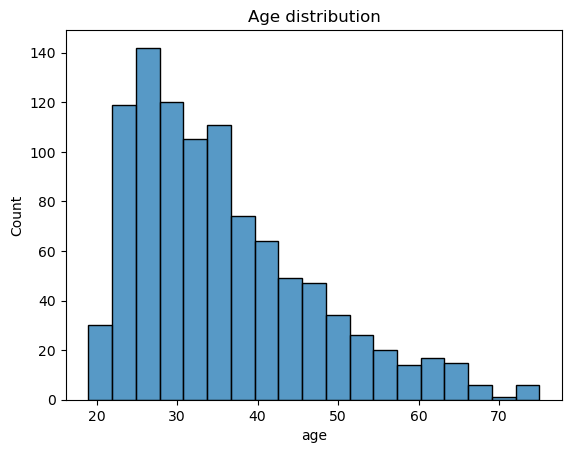

In [8]:
# Data visualization
sns.histplot(dataset['age'])
plt.title("Age distribution")
plt.show()

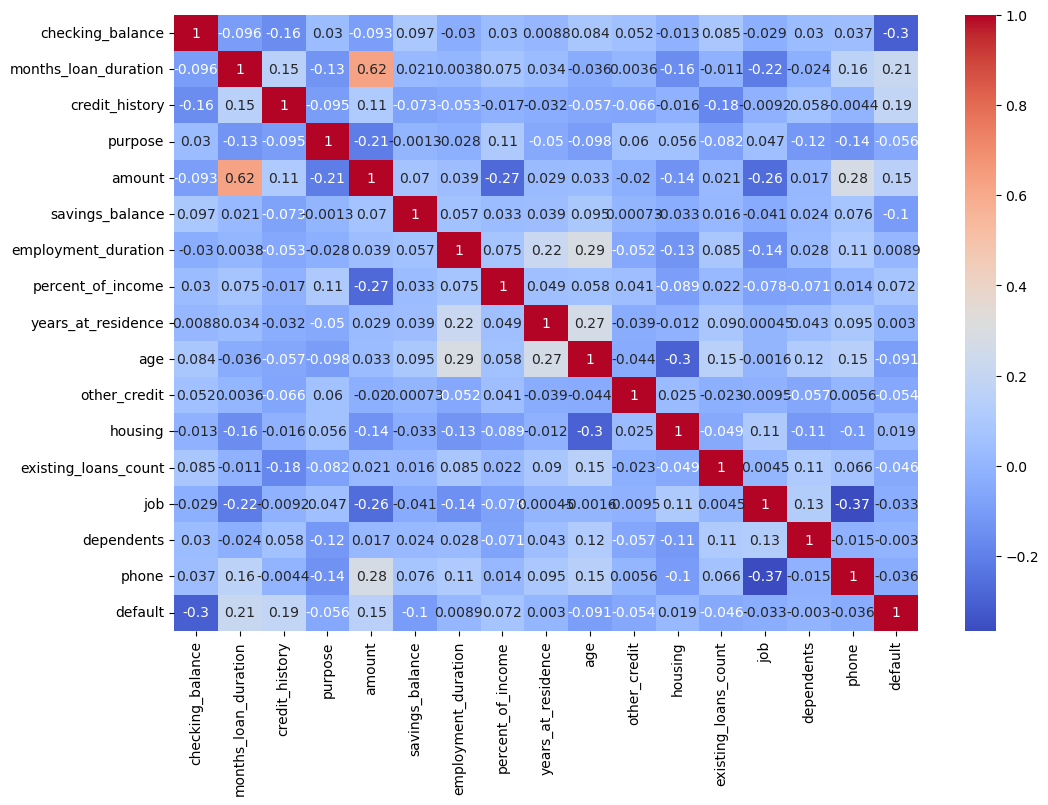

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.show()

In [10]:
# Machine learning model 
from sklearn.model_selection import train_test_split

X = dataset.drop('default',axis=1)
y = dataset['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("1.Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



1.Logistic Regression Results:
[[188  21]
 [ 68  23]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       209
           1       0.52      0.25      0.34        91

    accuracy                           0.70       300
   macro avg       0.63      0.58      0.57       300
weighted avg       0.67      0.70      0.67       300



In [12]:
from sklearn.svm import SVC

#2.SVM model
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("2.SVM Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



2.SVM Results:
[[209   0]
 [ 86   5]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       209
           1       1.00      0.05      0.10        91

    accuracy                           0.71       300
   macro avg       0.85      0.53      0.47       300
weighted avg       0.80      0.71      0.61       300



In [13]:
from sklearn.ensemble import RandomForestClassifier

#3.RandomForest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("3.Random Forest Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


3.Random Forest Results:
[[188  21]
 [ 51  40]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       209
           1       0.66      0.44      0.53        91

    accuracy                           0.76       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.75      0.76      0.74       300



In [14]:
from sklearn.ensemble import GradientBoostingClassifier

#4.Gradient Boosting model
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

print("4.Gradient Boosting Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


4.Gradient Boosting Results:
[[191  18]
 [ 49  42]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       209
           1       0.70      0.46      0.56        91

    accuracy                           0.78       300
   macro avg       0.75      0.69      0.70       300
weighted avg       0.77      0.78      0.76       300



In [15]:
from sklearn.naive_bayes import GaussianNB

# 5.Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("5.Naive Bayes Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


5.Naive Bayes Results:
[[186  23]
 [ 61  30]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       209
           1       0.57      0.33      0.42        91

    accuracy                           0.72       300
   macro avg       0.66      0.61      0.62       300
weighted avg       0.70      0.72      0.69       300



## Conclusion


In this project, we focused on predicting loan defaults for a German bank using various machine learning models. Our analysis showed that Random Forest and Gradient Boosting models provided the best performance, offering high accuracy and a good balance in predicting both default and non-default cases. While the SVM model also achieved high accuracy, it was less effective in identifying defaults. Logistic Regression and Naive Bayes models were useful but did not perform as well as the ensemble methods. Based on these results, we recommend using the Random Forest or Gradient Boosting models for better prediction of loan defaults. Additionally, continuously updating the model with new data will help improve its accuracy and adapt to changing conditions. Overall, the project demonstrates that machine learning can be a valuable tool for managing loan risks by predicting defaults more effectively.

